# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

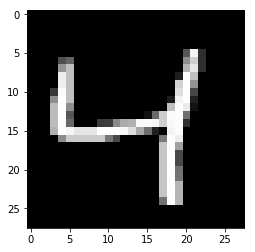

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, image_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6829
Epoch: 1/20... Training loss: 0.6780
Epoch: 1/20... Training loss: 0.6722
Epoch: 1/20... Training loss: 0.6647
Epoch: 1/20... Training loss: 0.6561
Epoch: 1/20... Training loss: 0.6467
Epoch: 1/20... Training loss: 0.6351
Epoch: 1/20... Training loss: 0.6222
Epoch: 1/20... Training loss: 0.6085
Epoch: 1/20... Training loss: 0.5919
Epoch: 1/20... Training loss: 0.5795
Epoch: 1/20... Training loss: 0.5630
Epoch: 1/20... Training loss: 0.5455
Epoch: 1/20... Training loss: 0.5311
Epoch: 1/20... Training loss: 0.5067
Epoch: 1/20... Training loss: 0.4899
Epoch: 1/20... Training loss: 0.4678
Epoch: 1/20... Training loss: 0.4530
Epoch: 1/20... Training loss: 0.4369
Epoch: 1/20... Training loss: 0.4257
Epoch: 1/20... Training loss: 0.4074
Epoch: 1/20... Training loss: 0.3893
Epoch: 1/20... Training loss: 0.3748
Epoch: 1/20... Training loss: 0.3747
E

Epoch: 2/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1736
Epoch: 2/20... Training loss: 0.1775
Epoch: 2/20... Training loss: 0.1797
Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1743
Epoch: 2/20... Training loss: 0.1849
Epoch: 2/20... Training loss: 0.1739
Epoch: 2/20... Training loss: 0.1715
Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1809
Epoch: 2/20... Training loss: 0.1733
Epoch: 2/20... Training loss: 0.1740
Epoch: 2/20... Training loss: 0.1797
Epoch: 2/20... Training loss: 0.1778
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1718
Epoch: 2/20... Training loss: 0.1694
Epoch: 2/20... Training loss: 0.1753
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1794
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1701
Epoch: 2/20... Training loss: 0.1756
Epoch: 2/20... Training loss: 0.1710
Epoch: 2/20... Training loss: 0.1809
Epoch: 2/20... Training loss: 0.1760
E

Epoch: 3/20... Training loss: 0.1467
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1477
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1466
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1464
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1408
E

Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1254
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1251
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1296
E

Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1109
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1180
E

Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1036
Epoch: 5/20... Training loss: 0.1048
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1066
E

Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1082
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1013
E

Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0944
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0981
E

Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0983
E

Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Tra

Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0868
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0877
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0888
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

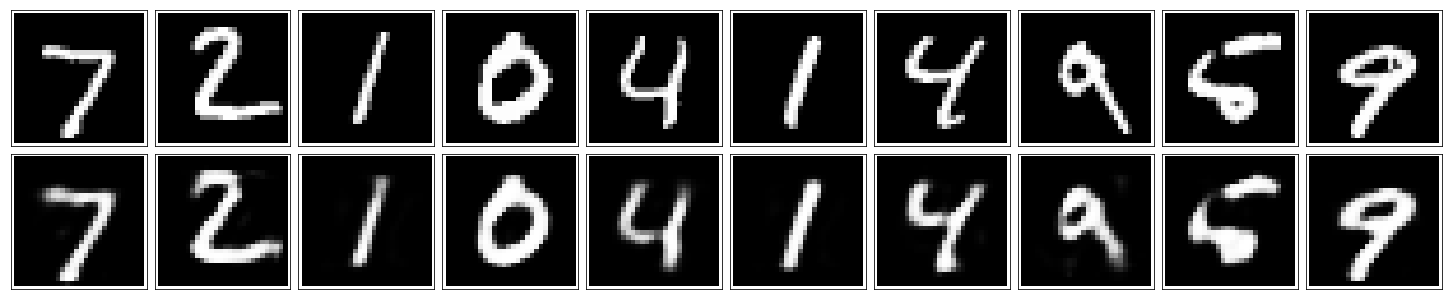

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.